In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [4]:
dating = pd.read_csv('http://knuth.luther.edu/~mestca01/Speed_Dating_Data.csv')

In [5]:
print('Total number of people that participated, assuming person does not appear in more than one wave: {}'.format(len(dating['iid'].unique())))
print('Total number of dates occurred: {}'.format(len(dating.index)))

Total number of people that participated, assuming person does not appear in more than one wave: 551
Total number of dates occurred: 8378


In [6]:
# out of curiosity, I want to see how many speed daters found a match!
pd.crosstab(index=dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


In [7]:
(1380/6998)*100

19.719919977136325

In [64]:
# narrowing dataset
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:104]
dating_8 = dating.iloc[:, 105:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5, dating_6,dating_7,dating_8], axis=1)

In [65]:
date2 = date.dropna()

In [66]:
date3 = date2.drop(['field', 'from', 'career'], axis=1)

In [11]:
interests = dating.iloc[:, 50:67]
interests.head()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
3,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
4,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0


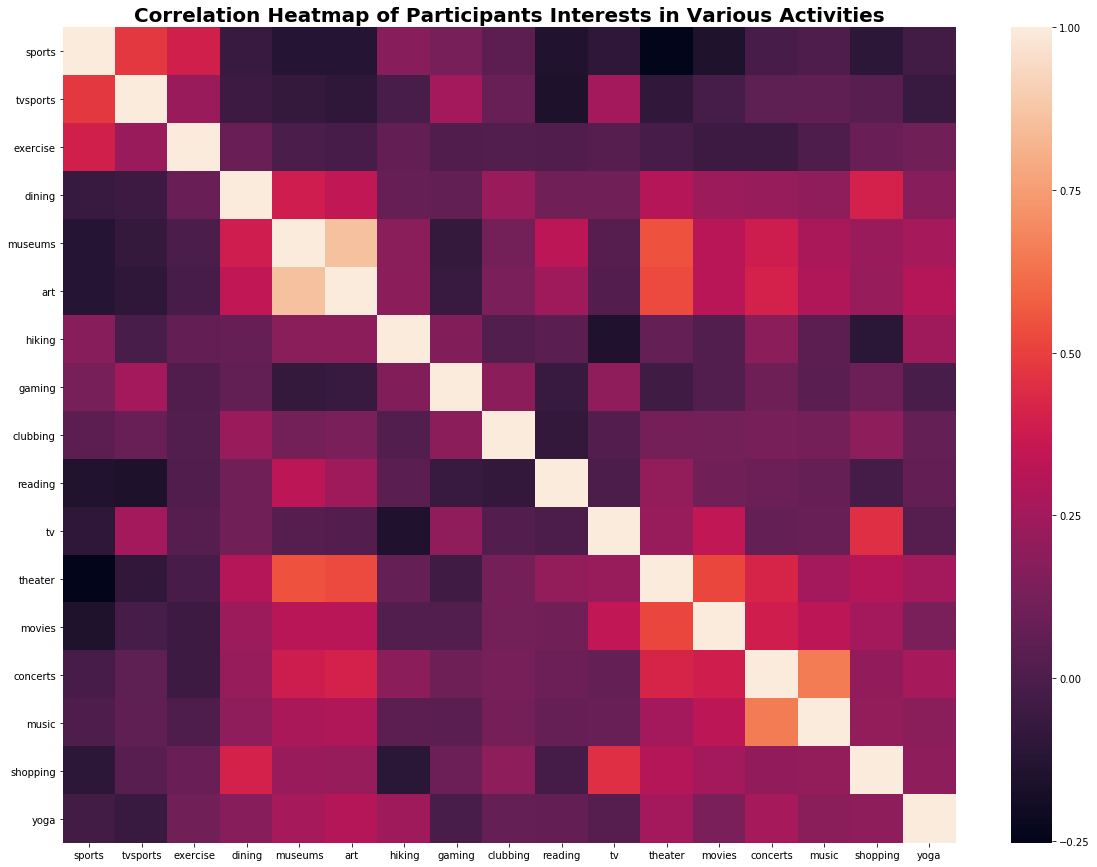

In [12]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap of Participants Interests in Various Activities", fontsize=20, fontweight='bold')
corr = interests.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Text(0,0.5,'Frequency')

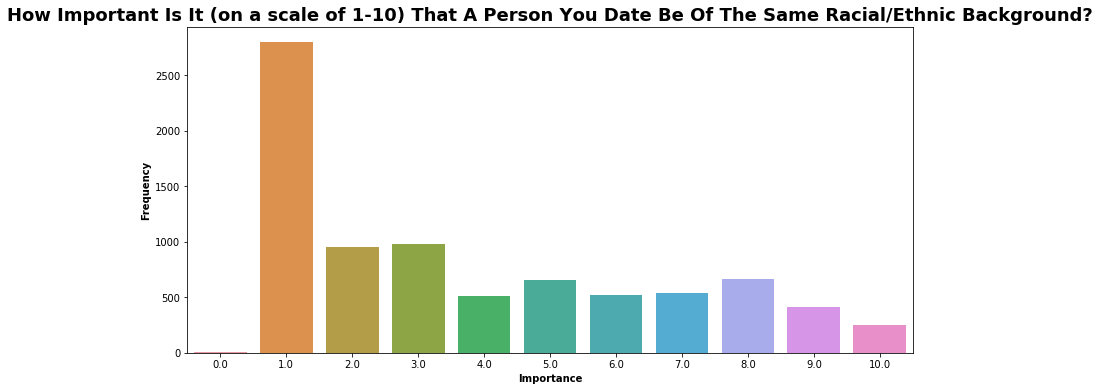

In [13]:
plt.figure(figsize=(13,6))
plt.title('How Important Is It (on a scale of 1-10) That A Person You Date Be Of The Same Racial/Ethnic Background?', fontsize=18, fontweight='bold')
sns.countplot(dating['imprace'])
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
# get rid of "0" column

Text(0,0.5,'Frequency')

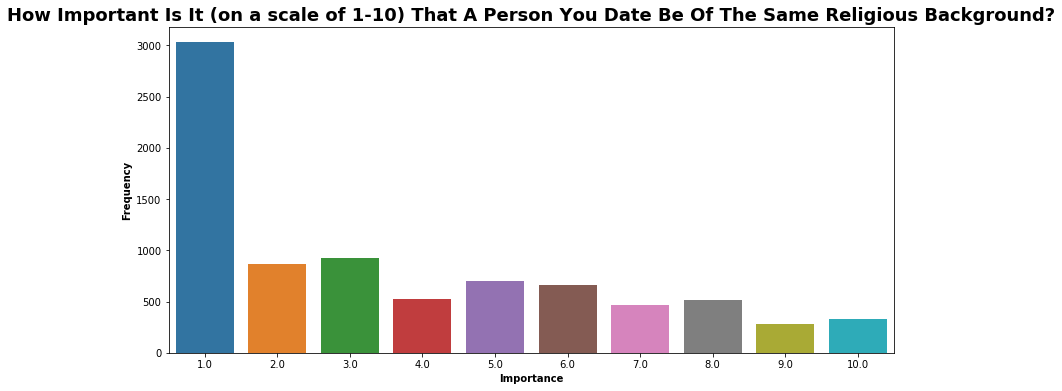

In [14]:
plt.figure(figsize=(13,6))
plt.title('How Important Is It (on a scale of 1-10) That A Person You Date Be Of The Same Religious Background?', fontsize=18, fontweight='bold')
sns.countplot(dating['imprelig'])
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')

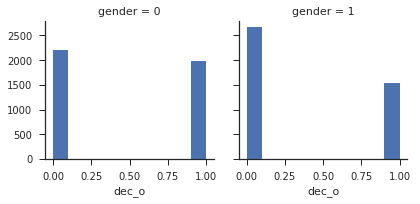

In [87]:
# looking at dec_o by gender
#It looks like women received about 2200 'no' and about 2000 'yes' for the decision question "Would you like to see him or her again?". Men received about 2600 'no' and about 1500 'yes'. In other words, men are more likely to be rejected by women than women are to be rejected by men (wahwah).
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(dating, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

In [16]:
attributes_gender = dating[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligent','Fun','Ambition','Shared Interests']
attributes_gender.columns = cols
attributes_gender

,Attractive,Sincere,Intelligent,Fun,Ambition,Shared Interests
gender,,,,,,
0,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194
1,26.921689,16.498436,19.537374,17.763893,8.552829,10.996574


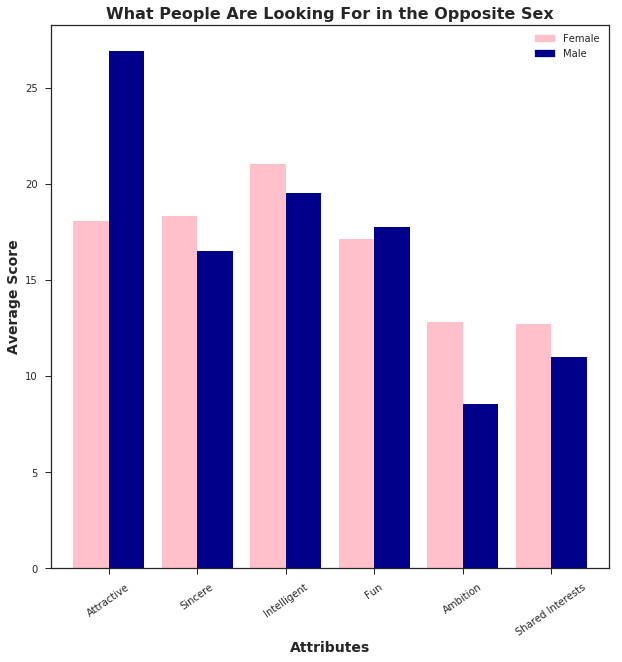

In [17]:
attributes_gender.T.plot(kind='bar', width=0.8, figsize=(10,10), color=['pink', 'darkblue'])
plt.xticks(rotation=35)
plt.xlabel('Attributes', size=14, fontweight="bold")
plt.ylabel('Average Score', size = 14, fontweight="bold")
plt.title("What People Are Looking For in the Opposite Sex", size = 16, fontweight="bold")
female = mpatches.Patch(color='pink', label='Female')
male = mpatches.Patch(color='darkblue', label='Male')
plt.legend(handles=[female, male])

In [18]:
# Men's are mostly looking for attractive woman, while women are looking for a well rounded man
#We can see that there is a great difference between what male and female participants are looking for.
#For male participants, the attractiveness of the female is given a lot more weight, and the ambitiousness or if they have any shared interset are ranked not as high.
#For females, the points are more evenly distributed across all of the attributes, with intelligence ranked slightly higher compared to others.
#Men are looking for attractive women, and are less concerned with a woman’s abmition and shared interests. On the other hand, women are looking for a well-rounded male and value intelligence in a man.

# Now let's take a look on 'What do you think the opposite sex looks for on a date?'
attributes_gender_2 = dating[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligent','Fun','Ambition','Shared Interests']
attributes_gender_2.columns = cols
attributes_gender_2

,Attractive,Sincere,Intelligent,Fun,Ambition,Shared Interests
gender,,,,,,
0,35.694349,11.343646,12.532022,18.733510,9.230638,12.645113
1,25.092631,15.181078,16.279633,18.115379,14.234815,11.071924


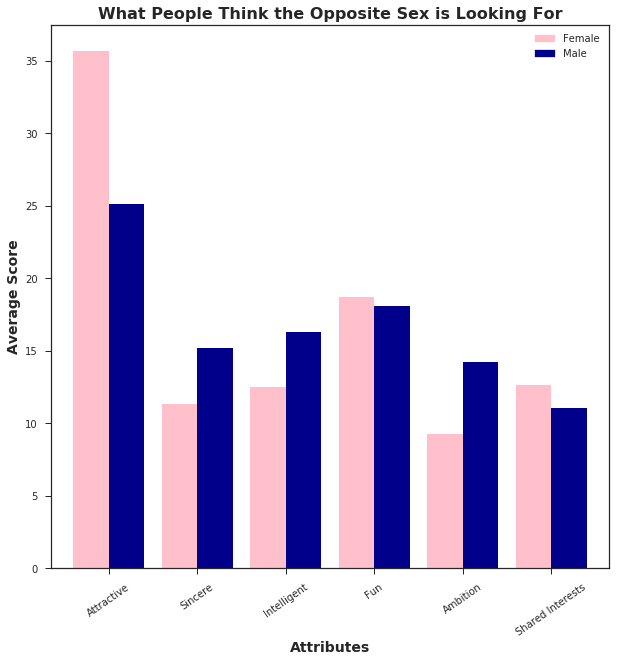

In [19]:
#Women strongly feel that men are most concerned with a woman’s attractiveness and that other attributes are not as important, especially ambitiousness.
#Comparing female and male answers in the first graph, we can see that there are not that much difference between the two. We can say that women almost accurately predicted what men are looking for in their partners (i.e. attractiveness).
#Additionally, men’s predictions were not far off either. By comparing males’ responses here and female’s responses in the first graph, what men think women are looking for also closely resembles what women say they are looking for. The main differences, though, are a higher attractiveness score and a lower shared interest score.
#Both men and women can predict what the opposite sex are looking for in their partners to a certain degree.

attributes_gender_2.T.plot(kind='bar', width=0.8, figsize=(10,10), color=['pink', 'darkblue'])
plt.xticks(rotation=35)
plt.xlabel('Attributes', size=14, fontweight="bold")
plt.ylabel('Average Score', size = 14, fontweight="bold")
plt.title("What People Think the Opposite Sex is Looking For", size = 16, fontweight="bold")
female = mpatches.Patch(color='pink', label='Female')
male = mpatches.Patch(color='darkblue', label='Male')
plt.legend(handles=[female, male])

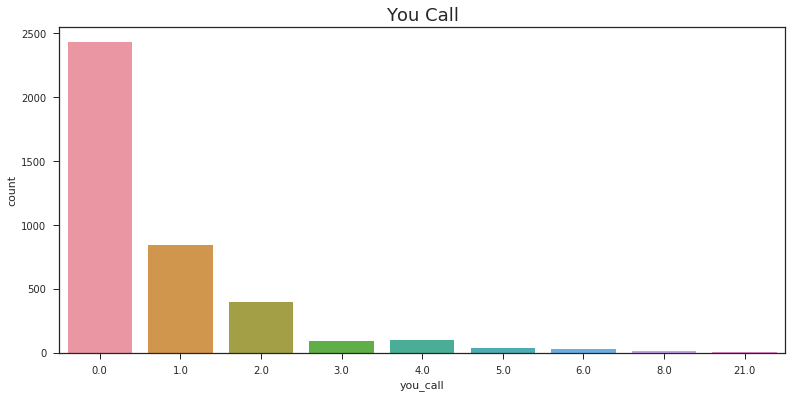

In [26]:
plt.figure(figsize=(13,6))
plt.title('You Call', fontsize=18)
sns.countplot(dating['you_call'])
# Even if you recieved a match, a majority of participants did not call their match

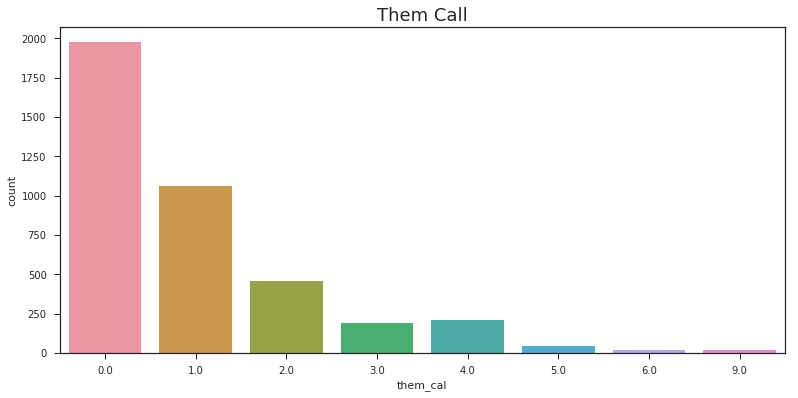

In [27]:
plt.figure(figsize=(13,6))
plt.title('Them Call', fontsize=18)
sns.countplot(dating['them_cal'])
# Your match was a chicken, too

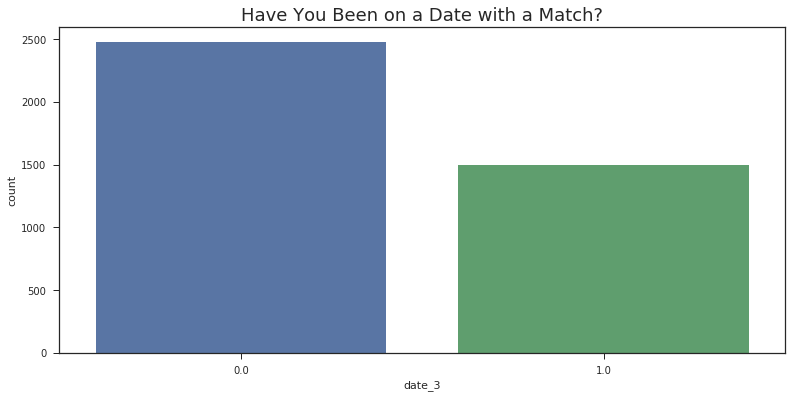

In [29]:
plt.figure(figsize=(13,6))
plt.title('Have You Been on a Date with a Match?', fontsize=18)
sns.countplot(dating['date_3'])

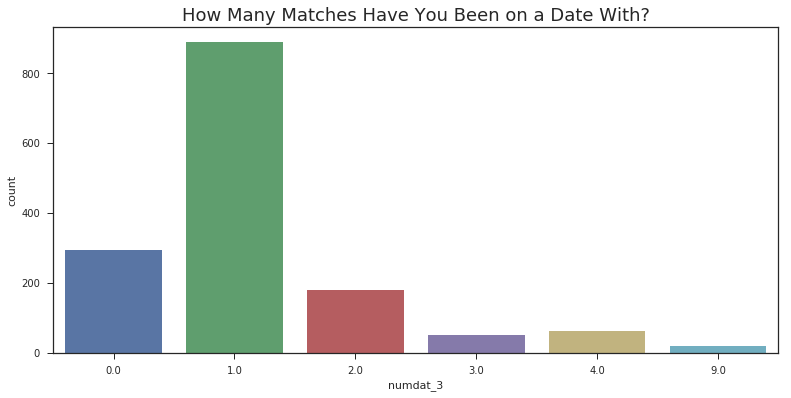

In [30]:
plt.figure(figsize=(13,6))
plt.title('How Many Matches Have You Been on a Date With?', fontsize=18)
sns.countplot(dating['numdat_3'])
#Most people, regardless of how many matches they recieved, only picked one match to go on a date with

In [69]:
#On an unrelated note, I wonder if the incidence of unrequited love differs by the attractiveness of the partner.
#encoding unrequited love as a new column (url) where decision of partner is no but decision of participant is yes, or where decision of partner is yes but decision of participant is no
date3['url']=np.where(((date3['dec_o']==0) & (date3['dec']==1))|((date3['dec']==0) & (date3['dec_o']==1)),1,0)
#when true/someone's heart is broken, url value is 1. when false/heart is no broken/both like each other, url value is 0

Text(0.5,0,'Broken Heart')

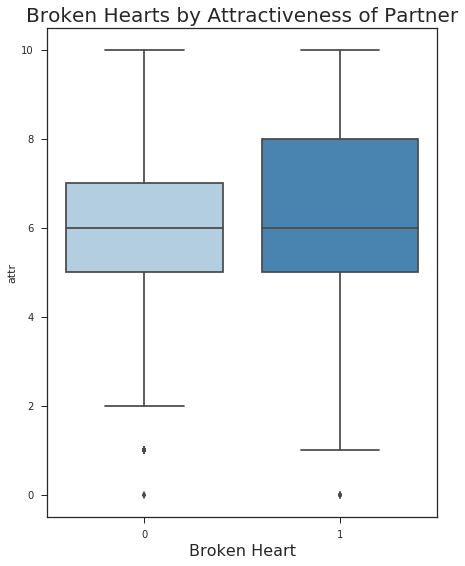

In [91]:
# looking at url by attractiveness
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr', data=date3, palette='Blues')
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)
#Looks like the difference in attractiveness was not statistically significant. So the good news is, the likelihood of getting rejected is not dependent on your attractiveness!

Text(0.5,0,'Broken Heart')

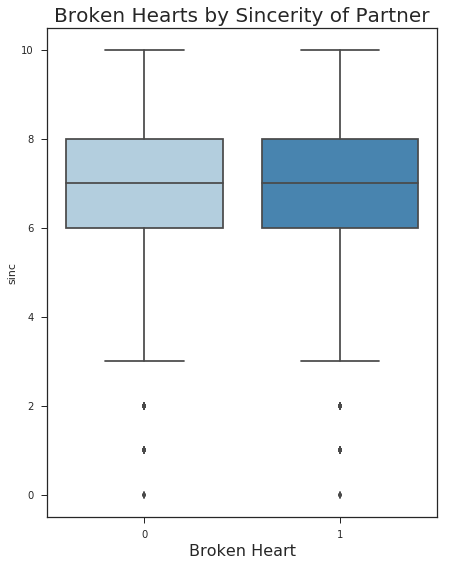

In [71]:
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='sinc', data=date3, palette='Blues')
plt.title('Broken Hearts by Sincerity of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)
#Looks like the difference in attractiveness was not statistically significant. So the good news is, the likelihood of getting rejected is not dependent on your attractiveness!

Text(0.5,0,'Broken Heart')

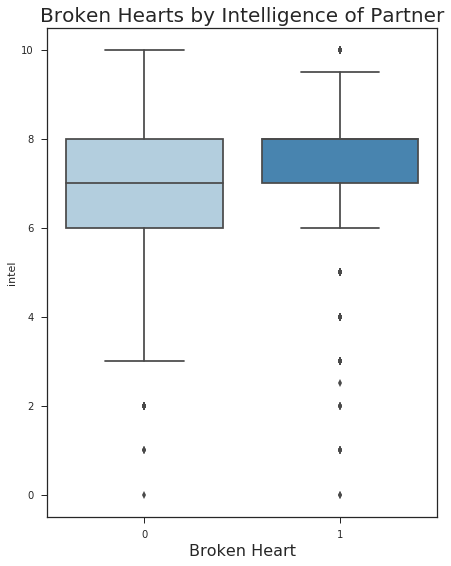

In [72]:
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='intel', data=date3, palette='Blues')
plt.title('Broken Hearts by Intelligence of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)
#?? Looks like the difference in intelligence is significant. So the good news is, the likelihood of getting rejected is not dependent on your attractiveness!

Text(0.5,0,'Broken Heart')

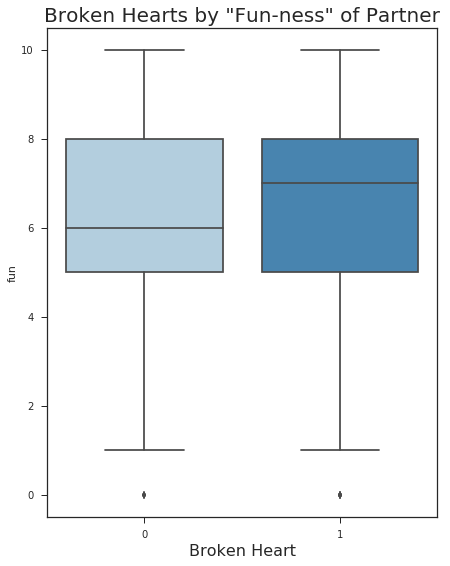

In [73]:
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='fun', data=date3, palette='Blues')
plt.title('Broken Hearts by "Fun-ness" of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)
#People with a higher fun-ness rating were rejected more

Text(0.5,0,'Broken Heart')

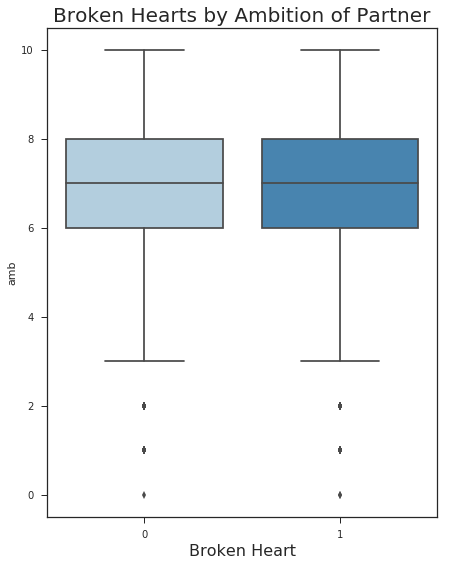

In [75]:
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='amb', data=date3, palette='Blues')
plt.title('Broken Hearts by Ambition of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)
#Looks like the difference in ambition was not statistically significant. So the good news is, the likelihood of getting rejected is not dependent on your attractiveness!

Text(0.5,0,'Broken Heart')

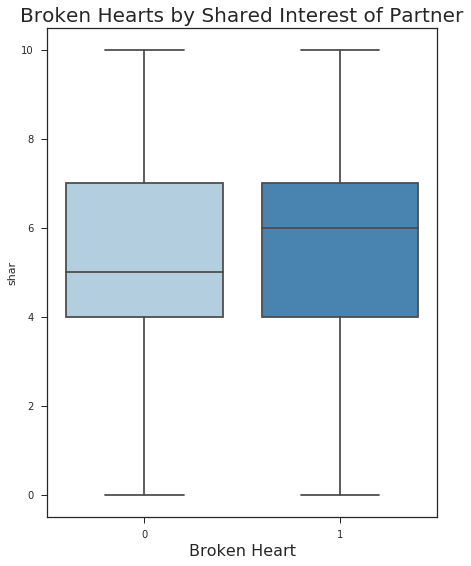

In [76]:
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='shar', data=date3, palette='Blues')
plt.title('Broken Hearts by Shared Interests of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

Text(0.5,0,'Broken Heart')

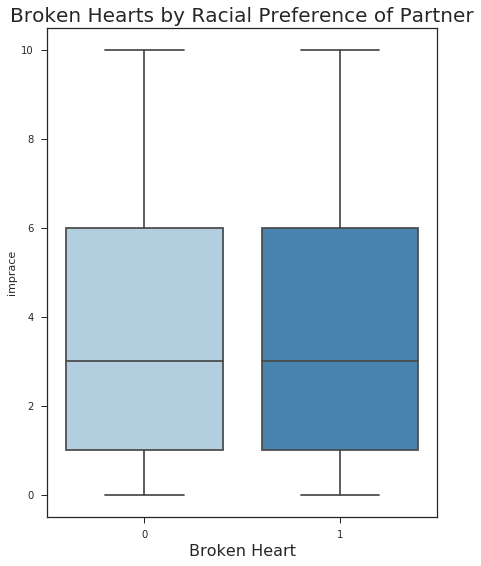

In [92]:
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='imprace', data=date3, palette='Blues')
plt.title('Broken Hearts by Racial Preference of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

Text(0.5,0,'Broken Heart')

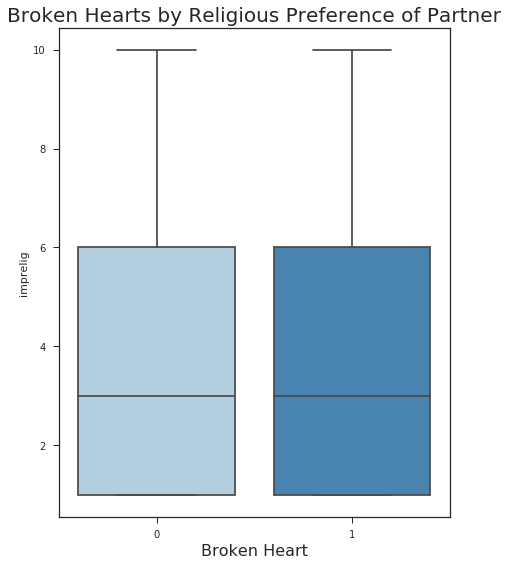

In [93]:
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='imprelig', data=date3, palette='Blues')
plt.title('Broken Hearts by Religious Preference of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

In [94]:
#it looks like all that really matters is the decision of both participants, and perhaps whether or not they liked one another
#BE YOURSELF!!!